## Importing the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import plotly.graph_objs as go
import seaborn as sns
sns.set()

## Loading Data

In [2]:
raw_data = pd.read_csv('1.05 STATION HIRONPOINT.csv')
raw_data.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
0,2017,1,1,101.52,14.48,25.83,0.00,3.45,68.81,15.99,12.643,5.516,2.80,0.73
1,2017,1,2,101.51,14.08,26.18,0.00,4.23,68.69,15.46,12.644,5.387,2.68,0.82
2,2017,1,3,101.44,15.01,26.30,0.08,4.81,73.44,15.34,12.713,5.232,2.66,0.80
3,2017,1,4,101.34,14.66,26.21,0.04,4.66,72.94,15.57,12.954,5.149,2.56,0.83
4,2017,1,5,101.32,13.23,25.94,0.02,4.98,69.50,14.65,12.956,5.065,2.50,0.86


## Handling Null Values

In [3]:
raw_data.isnull().sum()

YEAR                 0
MONTH                0
DAY                  0
SURFACE PRESSURE     0
DEW POINT            0
TEMPERATURE          0
PRECIPITATION        0
MAX WIND SPD         0
RELATIVE HUMIDITY    0
MIN TEMP             0
N_ICE EXTENT         0
S_ICE EXTENT         0
HIGH                 1
LOW                  0
dtype: int64

In [4]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2018.500000,6.526027,15.728767,100.793432,21.368678,29.565158,9.313692,5.216904,77.86539,23.058390,10.271556,11.062897,2.957377,0.833863
std,1.118417,3.449033,8.806059,0.576262,5.736076,3.091541,18.968023,1.587857,11.48626,5.084257,3.525952,5.797917,0.330116,0.397759
min,2017.000000,1.000000,1.000000,98.970000,2.780000,15.530000,0.000000,1.930000,38.31000,9.740000,3.793000,2.080000,2.100000,-0.240000
25%,2017.750000,4.000000,8.000000,100.327500,16.997500,28.057500,0.000000,4.260000,69.94000,19.165000,6.828750,5.176250,2.730000,0.570000
50%,2018.500000,7.000000,16.000000,100.830000,23.730000,29.950000,1.545000,4.900000,79.38000,25.560000,11.151000,11.898500,2.970000,0.820000
75%,2019.250000,10.000000,23.000000,101.290000,26.210000,31.490000,11.242500,5.740000,87.76500,27.150000,13.462000,16.883000,3.220000,1.070000
max,2020.000000,12.000000,31.000000,101.920000,28.010000,36.080000,224.520000,22.300000,94.62000,28.830000,15.071000,19.062000,3.790000,2.970000


## Distribution Check and Dealing With Outliers

In [5]:
df = data_no_mv

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


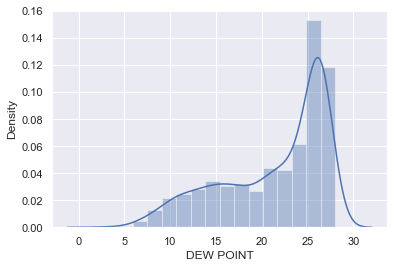

In [6]:
sns.distplot(df['DEW POINT'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


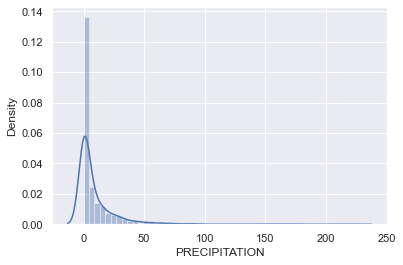

In [7]:
sns.distplot(df['PRECIPITATION'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


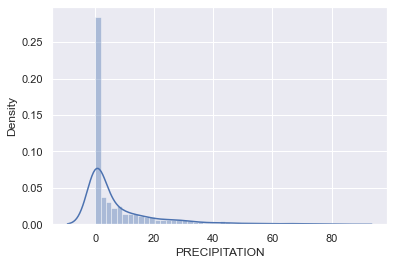

In [8]:
q = df['PRECIPITATION'].quantile(0.99)
data_1 = df[df['PRECIPITATION']<q]
sns.distplot(data_1['PRECIPITATION'])
plt.show()

In [9]:
data_cleaned = data_1.reset_index(drop=True)

In [10]:
data_cleaned = data_cleaned.drop(['LOW'],axis=1)

In [11]:
data_cleaned.corr()['HIGH']

YEAR                -0.001956
MONTH                0.376896
DAY                  0.012426
SURFACE PRESSURE    -0.535574
DEW POINT            0.526360
TEMPERATURE          0.138065
PRECIPITATION        0.346423
MAX WIND SPD         0.242229
RELATIVE HUMIDITY    0.553482
MIN TEMP             0.474381
N_ICE EXTENT        -0.558826
S_ICE EXTENT         0.592440
HIGH                 1.000000
Name: HIGH, dtype: float64

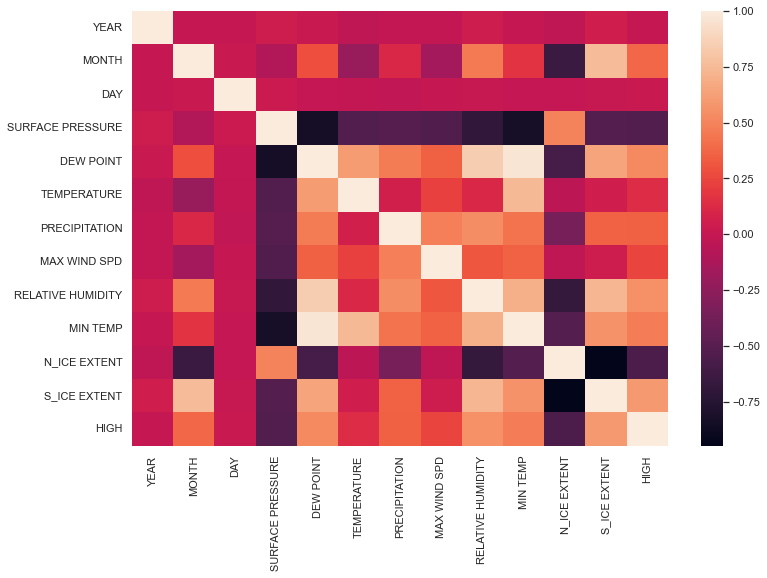

In [12]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sns.heatmap(data_cleaned.corr(), ax=ax)
plt.show()

In [13]:
data_cleaned = data_cleaned.drop(['DEW POINT'],axis=1)
data_cleaned = data_cleaned.drop(['MIN TEMP'],axis=1)
data_cleaned = data_cleaned.drop(['N_ICE EXTENT'],axis=1)
data_cleaned = data_cleaned.drop(['RELATIVE HUMIDITY'],axis=1)
data_cleaned.describe(include='all')

,YEAR,MONTH,DAY,SURFACE PRESSURE,TEMPERATURE,PRECIPITATION,MAX WIND SPD,S_ICE EXTENT,HIGH
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,2018.505882,6.507958,15.725952,100.799723,29.575716,8.022069,5.189889,11.012576,2.953405
std,1.118096,3.457614,8.817772,0.575111,3.104845,13.398900,1.558170,5.803321,0.328910
min,2017.000000,1.000000,1.000000,98.970000,15.530000,0.000000,1.930000,2.080000,2.100000
25%,2018.000000,4.000000,8.000000,100.330000,28.060000,0.000000,4.250000,5.114000,2.720000
50%,2019.000000,7.000000,16.000000,100.840000,29.980000,1.420000,4.880000,11.766000,2.970000
75%,2020.000000,10.000000,23.000000,101.290000,31.510000,10.470000,5.720000,16.879000,3.210000
max,2020.000000,12.000000,31.000000,101.920000,36.080000,84.240000,22.300000,19.062000,3.790000


## Neural Network Regression

### Train-Test Split

In [14]:
dataset = data_cleaned
train_dataset = dataset.sample(frac=0.8,random_state=22)
test_dataset = dataset.drop(train_dataset.index)

#### Separate the target value, or “label”, from the features. This label is the value that we will train the model to predict.

In [15]:
train_labels = train_dataset.pop('HIGH')
test_labels = test_dataset.pop('HIGH')

### Scaling the Input Data

In [16]:
scaler=MinMaxScaler()
scaler.fit(train_dataset)
normed_train_data = scaler.transform(train_dataset)
scaler.fit(test_dataset)
normed_test_data = scaler.transform(test_dataset)

### Model

In [17]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [18]:
NN_model = build_model()
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


### Training

In [19]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2500

history = NN_model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
2495,0.003126,0.043039,0.003126,0.023942,0.114542,0.023942,2495
2496,0.004790,0.053133,0.004790,0.026509,0.121508,0.026509,2496
2497,0.004862,0.053659,0.004862,0.025208,0.120439,0.025208,2497
2498,0.004110,0.048534,0.004110,0.024834,0.115666,0.024834,2498
2499,0.003383,0.045747,0.003383,0.026512,0.119915,0.026512,2499


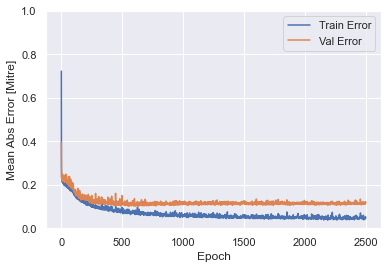

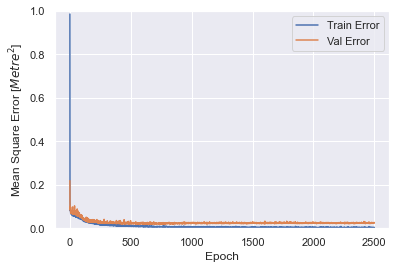

In [21]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Mitre]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Metre^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [22]:
#model = build_model()

#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
#                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

#plot_history(history)

### Testing

In [23]:
loss, mae, mse = NN_model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} M".format(mae))

Testing set Mean Abs Error:  0.15 M


In [24]:
y_pred_NN = NN_model.predict(normed_test_data)
Test_score_NN =r2_score(test_labels,y_pred_NN)
print("Testing Score: ",Test_score_NN)

Testing Score:  0.5494856101185028


### Visulizing Predictions

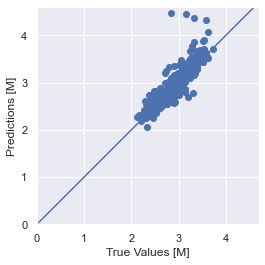

In [25]:
y_pred_NN = NN_model.predict(normed_test_data).flatten()

plt.scatter(test_labels, y_pred_NN)
plt.xlabel('True Values [M]')
plt.ylabel('Predictions [M]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

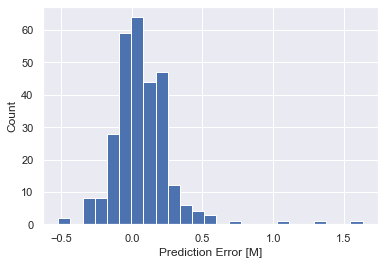

In [26]:
error = y_pred_NN - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [M]")
_ = plt.ylabel("Count")
plt.show()

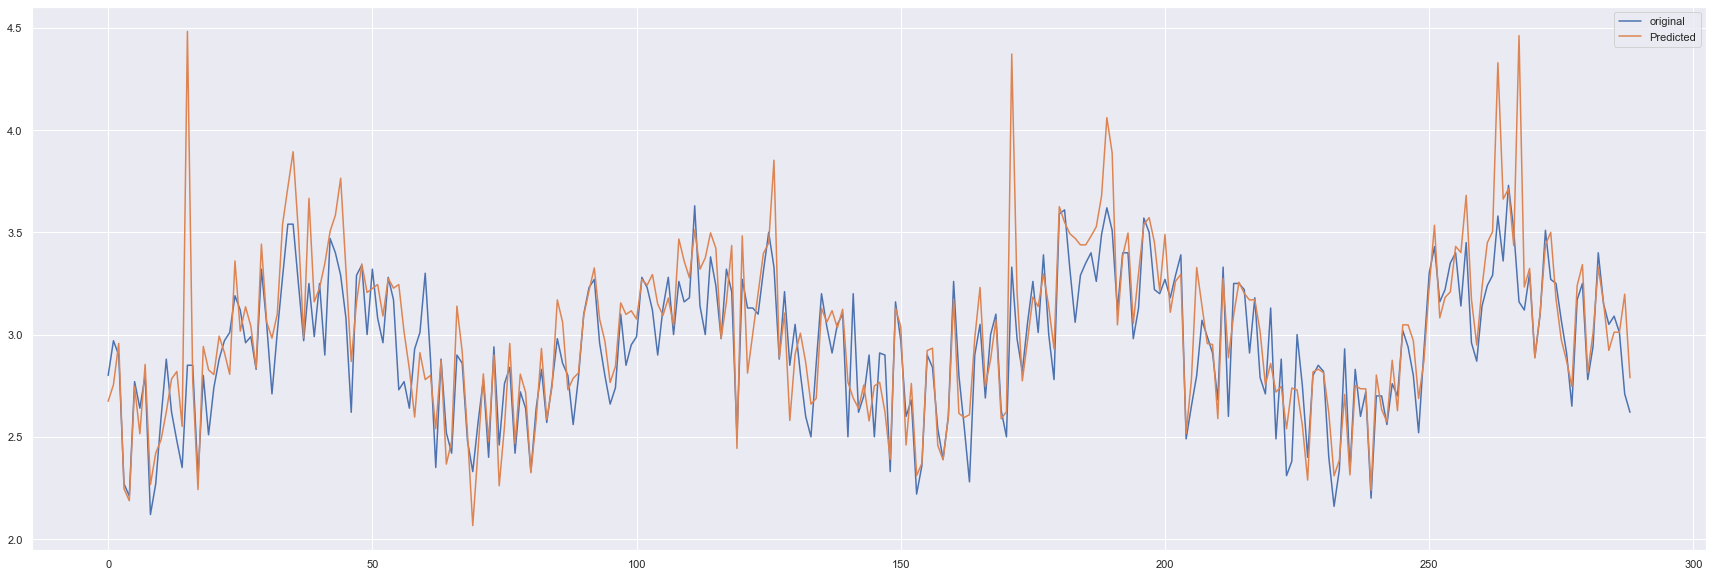

In [27]:
x_ax = range(len(test_labels))
plt.figure(figsize=(30,10))
plt.plot(x_ax, test_labels,label="original")
plt.plot(x_ax, y_pred_NN, label="Predicted")
plt.legend()
plt.show()

In [28]:
data_wmv = raw_data[raw_data.isnull().any(axis=1)]
data_wmv.head()

,YEAR,MONTH,DAY,SURFACE PRESSURE,DEW POINT,TEMPERATURE,PRECIPITATION,MAX WIND SPD,RELATIVE HUMIDITY,MIN TEMP,N_ICE EXTENT,S_ICE EXTENT,HIGH,LOW
1142,2020,2,17,101.5,13.19,27.91,0.0,4.78,63.19,15.33,14.665,2.758,NaN,0.77


In [29]:
scaler=MinMaxScaler()
scaler.fit(data_wmv)
normed_inp_data = scaler.transform(data_wmv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [30]:
test_predictions = NN_model.predict(normed_inp_data).flatten()
test_predictions

ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 8), found shape=(None, 14)
